# Atelier Données ouvertes

HNU3055 / HNU6055

**Équipe**
Parham Aledavood
Maxime Guénette
Amélie Levasseur-R.

**Question**
Voir s'il y a une relation entre le taux de vaccination et les cas et hospitalisations de COVID-19, selon les régions administratives du Québec.

**Sources des données**
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-de-la-vaccination#
https://www.donneesquebec.ca/recherche/dataset/covid-19-portrait-quotidien-des-hospitalisations/resource/2d8bd4f8-4715-4f33-8cb4-eefcec60a4c9

**Documents explicatifs**
listevariables_notesmetho_vaccination_20221107.pdf
listevariables_notesmetho_hospit_20220621.pdf


**Problèmes rencontrés**

- Adapter le code trouvé à nos besoins spécifiques. Par exemple, nous avons eu de la difficulté à conserver les colonnes qui contiennent "Total" et aussi celle de la date. -> RÉGLÉ!

- Rendre analyse proportionnelle selon la population de chaque région. Doit trouver données sur la population par région.

- Doit revoir les données de vaccination conservées, utiliser les données par jour et non le cumul qui ne peut qu'augmenter. -> RÉGLÉ!

## Charger les librairies

In [2]:
import pandas as pd

## Téléchargement des données

In [117]:
url_vacc = "https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_Vaccination_RegionResidence.csv"
df_vacc = pd.read_csv(url_vacc)
# source code : https://datatofish.com/export-dataframe-to-csv/
df_vacc.to_csv(r'data/raw/COVID19_Qc_Vaccination_RegionResidence.csv')

url_hosp = "https://msss.gouv.qc.ca/professionnels/statistiques/documents/covid19/COVID19_Qc_HistoHospit.csv"
df_hosp = pd.read_csv(url_hosp)
df_hosp.to_csv(r'data/raw/COVID19_Qc_HistoHospit.csv')


In [35]:
df_vacc

date  RSS01_DOSE_Numero1_cumu  RSS02_DOSE_Numero1_cumu  \
0    2020-12-14                        1                        0   
1    2020-12-15                        1                        5   
2    2020-12-16                        1                        6   
3    2020-12-17                        5                        9   
4    2020-12-18                        5                       11   
..          ...                      ...                      ...   
762  2023-01-15                   176334                   251359   
763  2023-01-16                   176334                   251359   
764  2023-01-17                   176334                   251360   
765  2023-01-18                   176334                   251361   
766  2023-01-19                   176336                   251362   

     RSS03_DOSE_Numero1_cumu  RSS04_DOSE_Numero1_cumu  \
0                        145                        1   
1                        786                       11   
2                       1300                       16   
3                       1767                       23   
4                       2256                       29   
..                       ...                      ...   
762                   681665                   454796   
763                   681667                   454796   
764                   681672                   454796   
765                   681674                   454796   
766                   681681                   454800   

     RSS05_DOSE_Numero1_cumu  RSS06_DOSE_Numero1_cumu  \
0                          6                      148   
1                         12                      531   
2                         19                      860   
3                         22                     1160   
4                         35                     1326   
..                       ...                      ...   
762                   438748                  1742087   
763                   438748                  1742125   
764                   438751                  1742161   
765                   438755                  1742186   
766                   438763                  1742226   

     RSS07_DOSE_Numero1_cumu  RSS08_DOSE_Numero1_cumu  \
0                          2                        0   
1                          7                        1   
2                         19                        2   
3                         37                        3   
4                         47                        3   
..                       ...                      ...   
762                   349424                   127538   
763                   349429                   127538   
764                   349429                   127538   
765                   349439                   127539   
766                   349443                   127544   

     RSS09_DOSE_Numero1_cumu  ...  RSS13_DOSES_Total_jour  \
0                          0  ...                       2   
1                          1  ...                      27   
2                          1  ...                      19   
3                          5  ...                      22   
4                          5  ...                      17   
..                       ...  ...                     ...   
762                    78410  ...                     105   
763                    78410  ...                     167   
764                    78411  ...                     147   
765                    78411  ...                     120   
766                    78411  ...                     147   

     RSS14_DOSES_Total_jour  RSS15_DOSES_Total_jour  RSS16_DOSES_Total_jour  \
0                         0                       2                       1   
1                         4                      11                      56   
2                         6                      11                      48   
3                         9                      14                      44   

In [36]:
df_hosp

Date  ACT_Hsi_RSS01  ACT_Hsi_RSS02  ACT_Hsi_RSS03  ACT_Hsi_RSS04  \
0    2023-01-19             33             43            159             80   
1    2023-01-18             35             45            167             86   
2    2023-01-17             35             48            177             87   
3    2023-01-16             39             52            178             90   
4    2023-01-13             45             58            177             89   
..          ...            ...            ...            ...            ...   
938  2020-04-14              1              3             30             38   
939  2020-04-13              0              2             30             39   
940  2020-04-12              0              2             29             36   
941  2020-04-11              0              1             27             32   
942  2020-04-10              0              2             29             30   

     ACT_Hsi_RSS05  ACT_Hsi_RSS06  ACT_Hsi_RSS07  ACT_Hsi_RSS08  \
0              125            445            102             14   
1              131            459            100             16   
2              129            469            100             17   
3              126            472            103             22   
4              139            483             98             22   
..             ...            ...            ...            ...   
938             48            441              0              3   
939             43            420              1              4   
940             38            382              1              5   
941             41            365              0              5   
942             36            356              0              5   

     ACT_Hsi_RSS09  ...  ACT_Total_RSS10  ACT_Total_RSS11  ACT_Total_RSS12  \
0               42  ...                1               17               77   
1               43  ...                1               18               81   
2               45  ...                0               19               78   
3               46  ...                0               20               75   
4               46  ...                0               21               66   
..             ...  ...              ...              ...              ...   
938              0  ...                0                0                7   
939              0  ...                0                0                6   
940              0  ...                0                0                6   
941              0  ...                0                0                7   
942              0  ...                0                0                6   

     ACT_Total_RSS13  ACT_Total_RSS14  ACT_Total_RSS15  ACT_Total_RSS16  \
0                 70               74              136              310   
1                 70               72              142              317   
2                 70               75              141              330   
3                 71               74              145              343   
4                 72               80              153              359   
..               ...              ...              ...              ...   
938               63               35               18               89   
939               61               37               17               93   
940               56               37               12               85   
941               48               36               12               81   
942               45               35               13               71   

     ACT_Total_RSS17  ACT_Total_RSS18  ACT_Total_RSS99  
0                  0                0             1762  
1                  0                0             1819  
2                  0                0             1859  
3                  0                0             1897  
4                  0                0             1946  
..               ...              ...              ...  
938                1

## Nettoyage et manipulations des données

### Hospitalisations

In [104]:
# df_hosp.rename(columns = {'Date':'date'})

# éliminer les données d'avant 2021
df_hosp = df_hosp[df_hosp["Date"].str.contains("2020") == False]

# ordonner en ordre croissant de date
df_hosp = df_hosp.sort_values("Date", ascending=True)

# conserver seulement les colonnes total , en plus de la date
# source code : https://stackoverflow.com/questions/69387240/how-to-drop-columns-which-contains-specific-characters-except-one-column
df_hosp_total = df_hosp.loc[:, df_hosp.columns.str.contains("Total") | (df_hosp.columns == "Date")]

df_hosp_total.to_csv(r'data/processed/COVID19_Qc_HistoHospit.csv')
df_hosp_total

Date  ACT_Total_RSS01  ACT_Total_RSS02  ACT_Total_RSS03  \
676  2021-01-01                3               45              103   
675  2021-01-02                4               47              118   
674  2021-01-03                4               47              121   
673  2021-01-04                2               47              111   
672  2021-01-05                1               48              122   
..          ...              ...              ...              ...   
4    2023-01-13               45               60              179   
3    2023-01-16               39               53              181   
2    2023-01-17               36               50              180   
1    2023-01-18               36               46              170   
0    2023-01-19               34               44              164   

     ACT_Total_RSS04  ACT_Total_RSS05  ACT_Total_RSS06  ACT_Total_RSS07  \
676               48               40              508               39   
675               56               37              570               44   
674               61               63              593               44   
673               61               64              631               40   
672               57               72              662               40   
..               ...              ...              ...              ...   
4                 92              139              514               98   
3                 93              126              505              104   
2                 89              129              499              101   
1                 89              131              486              101   
0                 83              125              467              103   

     ACT_Total_RSS08  ACT_Total_RSS09  ACT_Total_RSS10  ACT_Total_RSS11  \
676                2                3                0                2   
675                2                4                0                2   
674                2                4                0                2   
673                1                4                0                2   
672                1                4                0                3   
..               ...              ...              ...              ...   
4                 22               46                0               21   
3                 22               46                0               20   
2                 17               45                0               19   
1                 16               43                1               18   
0                 15               42                1               17   

     ACT_Total_RSS12  ACT_Total_RSS13  ACT_Total_RSS14  ACT_Total_RSS15  \
676               23               51               25               52   
675               28               64               32               51   
674               28               68               37               54   
673               25               65               39               52   
672               30               65               41               53   
..               ...              ...              ...              ...   
4                 66               72               80              153   
3                 75               71               74              145   
2                 78               70               75              141   
1                 81               70               72              142   
0                 77               70               74              136   

     ACT_Total_RSS16  ACT_Total_RSS17  ACT_Total_RSS18  ACT_Total_RSS99  
676              131                0                0             1075  
675              166                0                0             1225  
674              166                0                0             1294  
673              173                0                0             1317  
672              194                0                0             1393  
..               ...   

### Vaccination

In [120]:
# éliminer les données d'avant 2021
df_vacc = df_vacc[df_vacc["date"].str.contains("2020") == False]

# ordonner en ordre croissant de date
df_vacc = df_vacc.sort_values("date", ascending=True)

# conserver seulement les cumulatifs, et la date
#df_vacc_cumu = df_vacc.loc[:, df_vacc.columns.str.contains("cumu") | (df_vacc.columns == "date")]
#df_vacc_cumu = df_vacc_cumu.drop(columns=["RSSND_DOSES_Total_cumu", "RSSHQ_DOSES_Total_cumu", "RSSAL_DOSES_Total_cumu"])

# conserver seulement les données par jour, et la date
df_vacc_jour = df_vacc.loc[:, df_vacc.columns.str.contains("jour") | (df_vacc.columns == "date")]
df_vacc_jour = df_vacc_jour.drop(columns=["RSSND_DOSES_Total_jour", "RSSHQ_DOSES_Total_jour", "RSSAL_DOSES_Total_jour"])

df_vacc_jour.to_csv(r'data/processed/COVID19_Qc_Vaccination_RegionResidence.csv')
df_vacc_jour

date  RSS01_DOSE_Numero1_jour  RSS02_DOSE_Numero1_jour  \
18   2021-01-01                        0                        0   
19   2021-01-02                        0                      148   
20   2021-01-03                        3                      400   
21   2021-01-04                        5                      486   
22   2021-01-05                       12                      210   
..          ...                      ...                      ...   
762  2023-01-15                        0                        1   
763  2023-01-16                        0                        0   
764  2023-01-17                        0                        1   
765  2023-01-18                        0                        1   
766  2023-01-19                        2                        1   

     RSS03_DOSE_Numero1_jour  RSS04_DOSE_Numero1_jour  \
18                         2                        0   
19                         4                        9   
20                       304                       12   
21                       467                      197   
22                       881                      526   
..                       ...                      ...   
762                        3                        0   
763                        2                        0   
764                        5                        0   
765                        2                        0   
766                        7                        4   

     RSS05_DOSE_Numero1_jour  RSS06_DOSE_Numero1_jour  \
18                         1                       32   
19                       183                       38   
20                       171                       45   
21                        11                      634   
22                        87                     1985   
..                       ...                      ...   
762                        0                       14   
763                        0                       38   
764                        3                       36   
765                        4                       25   
766                        8                       40   

     RSS07_DOSE_Numero1_jour  RSS08_DOSE_Numero1_jour  \
18                        34                        0   
19                        36                        0   
20                        40                        0   
21                       136                        4   
22                       135                      121   
..                       ...                      ...   
762                        0                        0   
763                        5                        0   
764                        0                        0   
765                       10                        1   
766                        4                        5   

     RSS09_DOSE_Numero1_jour  ...  RSS10_DOSES_Total_jour  \
18                         0  ...                       0   
19                         1  ...                       0   
20                         2  ...                       0   
21                         2  ...                       0   
22                         2  ...                       2   
..                       ...  ...                     ...   
762                        0  ...                       0   
763                        0  ...                       2   
764                        1  ...                       0   
765                        0  ...                       9   
766                        0  ...                      28   

     RSS11_DOSES_Total_jour  RSS12_DOSES_Total_jour  RSS13_DOSES_Total_jour  \
18                        0                       0                       1   
19                        1                       3                      13   
20                        0                     347                      13   
21                        4                     103                     132   

### Cas

## Visualisations

<AxesSubplot:xlabel='Date'>

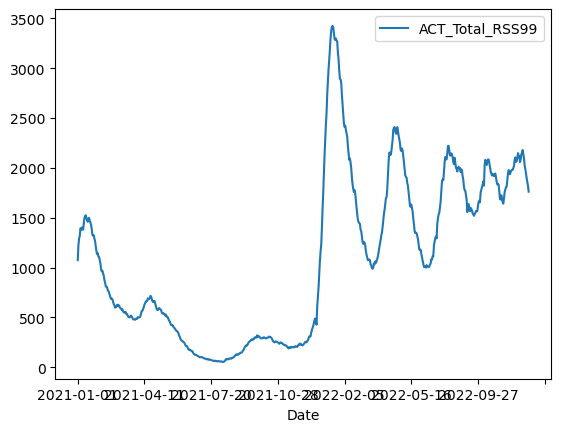

In [113]:
df_hosp_total.plot(x= "Date", y="ACT_Total_RSS99")

<AxesSubplot:xlabel='date'>

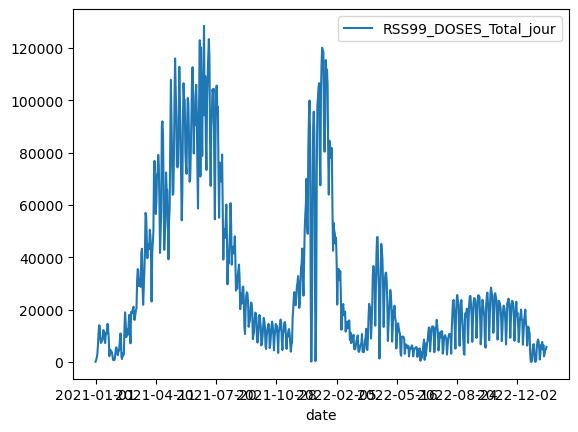

In [121]:
df_vacc_jour.plot(x= "date", y="RSS99_DOSES_Total_jour")